In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.cluster import KMeans
import pydotplus
from IPython.display import Image
%matplotlib inline

#Vaikuttaa kaavioiden ulkoasuun:
sns.set()

In [2]:
df=pd.read_excel('http://taanila.fi/wine.xlsx')
df.rename(columns={'Y':'Viini'}, inplace=True)
df.head()

,Viini,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#Tehdään fature-matriisi,jota varten pudotetaan Y-muuttuja
X = df.drop('Viini', axis=1)

#Tehdään target eli viini
y = df['Viini']

In [4]:
#jaetaan data testidataan ja opetusdataan
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [5]:
#Sovitetaan opetusdata ja testidata K-nearest neighbors-malliin (KNN)
malli = KNeighborsClassifier(n_neighbors=1)
malli.fit(X_train, y_train)

#Mallin mukaisten ennusteiden laskeminen opetusdatalle ja testidatalle:
y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)

In [6]:
#Oikeaan osuneiden ennusteiden osuus datoissa
as_train = accuracy_score(y_train, y_train_malli)
as_test = accuracy_score(y_test, y_test_malli)

#Confusion-matriisit datoille
cm_train = confusion_matrix(y_train, y_train_malli)
cm_test = confusion_matrix(y_test, y_test_malli)

print('Oikeaan osuneiden ennusteiden osuus opetusdatassa = {}'.format(as_train))
print('Confusion-matriisi opetusdatalle = \n {}'.format(cm_train) + "\n")
print('Oikeaan osuneiden ennusteiden osuus testidatassa = {}'.format(as_test))
print('Confusion-matriisi testidatalle = \n {}'.format(cm_test))

Oikeaan osuneiden ennusteiden osuus opetusdatassa = 1.0
Confusion-matriisi opetusdatalle = 
 [[40  0  0]
 [ 0 57  0]
 [ 0  0 36]]

Oikeaan osuneiden ennusteiden osuus testidatassa = 0.7555555555555555
Confusion-matriisi testidatalle = 
 [[15  2  2]
 [ 1 12  1]
 [ 1  4  7]]


Kun naapureiden lukumääräksi määritellään 1, osuu on KNN-malli täydellisesti opetusdatan osalta. Testidatassa se kuitenkin osuu 
vain 75%

In [7]:
#Uusi dataframe
df2=pd.read_excel('http://taanila.fi/wine.xlsx')
df2.rename(columns={'Y':'Viini'}, inplace=True)

In [8]:
#Tehdään fature-matriisi,jota varten pudotetaan Y-muuttuja
X = df2.drop('Viini', axis=1)

#Tehdään target eli viini
y = df2['Viini']

In [9]:
#jaetaan data uudestaan testidataan ja opetusdataan
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [10]:
#Sovitetaan opetusdata ja testidata Gaussian Naive Bayes-maliin
malli = GaussianNB()
malli.fit(X_train, y_train)

#Mallin mukaisten ennusteiden laskeminen opetusdatalle ja testidatalle:
y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)

In [11]:
#Oikeaan osuneiden ennusteiden osuus datoissa
as_train = accuracy_score(y_train, y_train_malli)
as_test = accuracy_score(y_test, y_test_malli)

#Confusion-matriisit datoille
cm_train = confusion_matrix(y_train, y_train_malli)
cm_test = confusion_matrix(y_test, y_test_malli)

print('Oikeaan osuneiden ennusteiden osuus opetusdatassa = {}'.format(as_train))
print('Confusion-matriisi opetusdatalle = \n {}'.format(cm_train) + "\n")
print('Oikeaan osuneiden ennusteiden osuus testidatassa = {}'.format(as_test))
print('Confusion-matriisi testidatalle = \n {}'.format(cm_test))

Oikeaan osuneiden ennusteiden osuus opetusdatassa = 0.9924812030075187
Confusion-matriisi opetusdatalle = 
 [[40  0  0]
 [ 0 56  1]
 [ 0  0 36]]

Oikeaan osuneiden ennusteiden osuus testidatassa = 0.9333333333333333
Confusion-matriisi testidatalle = 
 [[16  3  0]
 [ 0 14  0]
 [ 0  0 12]]


Gaussian Naive Bayes-malli onnistuu ennustamaan opetusdatan lähes täydellisesti ja testidatan melko hyvin: 93% 

In [12]:
#Uusi dataframe
df3=pd.read_excel('http://taanila.fi/wine.xlsx')
df3.rename(columns={'Y':'Viini'}, inplace=True)

In [13]:
#Tehdään fature-matriisi,jota varten pudotetaan Y-muuttuja
X = df3.drop('Viini', axis=1)

#Tehdään target eli viini
y = df3['Viini']

In [14]:
#jaetaan data uudestaan testidataan ja opetusdataan
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [15]:
#Sovitetaan opetusdata ja testidata logistisen regression malliin
malli = LogisticRegression()
malli.fit(X_train, y_train)

#Mallin mukaisten ennusteiden laskeminen opetusdatalle ja testidatalle:
y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)

C:\Users\Oem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Oem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [16]:
#Oikeaan osuneiden ennusteiden osuus datoissa
as_train = accuracy_score(y_train, y_train_malli)
as_test = accuracy_score(y_test, y_test_malli)

#Confusion-matriisit datoille
cm_train = confusion_matrix(y_train, y_train_malli)
cm_test = confusion_matrix(y_test, y_test_malli)

print('Oikeaan osuneiden ennusteiden osuus opetusdatassa = {}'.format(as_train))
print('Confusion-matriisi opetusdatalle = \n {}'.format(cm_train) + "\n")
print('Oikeaan osuneiden ennusteiden osuus testidatassa = {}'.format(as_test))
print('Confusion-matriisi testidatalle = \n {}'.format(cm_test))

Oikeaan osuneiden ennusteiden osuus opetusdatassa = 0.9849624060150376
Confusion-matriisi opetusdatalle = 
 [[39  1  0]
 [ 0 56  1]
 [ 0  0 36]]

Oikeaan osuneiden ennusteiden osuus testidatassa = 0.9111111111111111
Confusion-matriisi testidatalle = 
 [[18  1  0]
 [ 1 12  1]
 [ 0  1 11]]


Logistinen regressio onnistuu ennustamaan opetusdatan lähes täydellisesti ja testidatan melko hyvin: 91% 

In [17]:
X1 = df3.drop('Viini', axis=1).head()
malli.predict_proba(X1).tolist()

[[0.9953236969091906, 0.003901048256518427, 0.0007752548342909642],
 [0.9973359661712653, 0.0020359819078957465, 0.0006280519208389809],
 [0.998412647276359, 0.0002656066409693722, 0.0013217460826716399],
 [0.9959925360896443, 1.6826052546960613e-07, 0.004007295649830306],
 [0.080899932964534, 0.9114567256185591, 0.007643341416906983]]

Ensimmäinen rivi on 99,532 % todennäköisyydellä viini1,  0,390 % todennäköisyydellä viini2 ja 0,0775 % todennäköisyydellä viini3.

In [18]:
#Uusi dataframe
df4=pd.read_excel('http://taanila.fi/wine.xlsx')
df4.rename(columns={'Y':'Viini'}, inplace=True)

In [19]:
#Tehdään fature-matriisi,jota varten pudotetaan Y-muuttuja
X = df4.drop('Viini', axis=1)

#Tehdään target eli viini
y = df4['Viini']

In [20]:
#jaetaan data uudestaan testidataan ja opetusdataan
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [21]:
#Sovitetaan opetusdata ja testidata päätöspuu-malliin
malli = tree.DecisionTreeClassifier(max_depth=3)
malli.fit(X_train, y_train)

#Mallin mukaisten ennusteiden laskeminen opetusdatalle ja testidatalle:
y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)

In [22]:
#Oikeaan osuneiden ennusteiden osuus datoissa
as_train = accuracy_score(y_train, y_train_malli)
as_test = accuracy_score(y_test, y_test_malli)

#Confusion-matriisit datoille
cm_train = confusion_matrix(y_train, y_train_malli)
cm_test = confusion_matrix(y_test, y_test_malli)

print('Oikeaan osuneiden ennusteiden osuus opetusdatassa = {}'.format(as_train))
print('Confusion-matriisi opetusdatalle = \n {}'.format(cm_train) + "\n")
print('Oikeaan osuneiden ennusteiden osuus testidatassa = {}'.format(as_test))
print('Confusion-matriisi testidatalle = \n {}'.format(cm_test))

Oikeaan osuneiden ennusteiden osuus opetusdatassa = 1.0
Confusion-matriisi opetusdatalle = 
 [[40  0  0]
 [ 0 57  0]
 [ 0  0 36]]

Oikeaan osuneiden ennusteiden osuus testidatassa = 0.9111111111111111
Confusion-matriisi testidatalle = 
 [[17  2  0]
 [ 1 12  1]
 [ 0  0 12]]


Max depth 3 antaa antaa jo parhaimman tuloksen mihin malli pystyy. Päätöspuu ennustaa opetusdatan täydellisesti ja testi datan melko hyvin: 91%

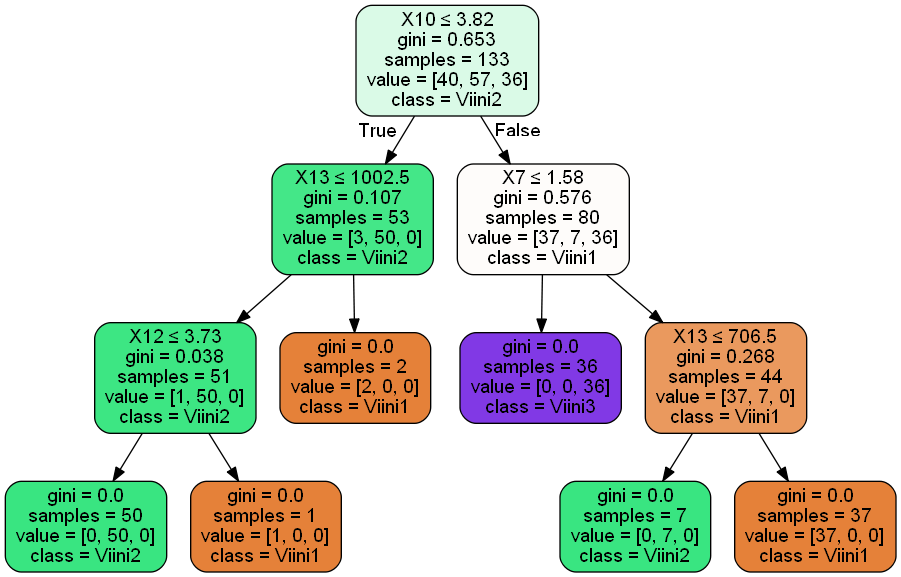

In [23]:
#Päätösåuun graafinen esittäminen
dot_data = tree.export_graphviz(malli, out_file=None, 
                         feature_names=X.columns,
                         class_names=['Viini1', 'Viini2', 'Viini3'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [24]:
#Uusi dataframe
df5=pd.read_excel('http://taanila.fi/wine.xlsx')
df5.rename(columns={'Y':'Viini'}, inplace=True)

In [25]:
#Tehdään fature-matriisi,jota varten pudotetaan Y-muuttuja
X = df5.drop('Viini', axis=1)

In [26]:
#Sovitetaan opetusdata ja testidata K-means clustering-malliin
malli = KMeans(n_clusters=3)
malli.fit(X)

#Ryhmien keskukset (sepal_length, sepal_width, petal_length, petal_width):
malli.cluster_centers_

array([[1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

In [27]:
#Ryhmiin kuulumiset:
X['K'] = malli.predict(X)
pd.crosstab(X['K'], 'lkm')

col_0,lkm
K,
0,69
1,47
2,62


In [28]:
#Tunnuslukuja ryhmittäin:
X.groupby('K').describe().style.format('{:.1f}')

In [29]:
#Katsotaan miten muodostetut ryhmät suhteutuava lajikkeisiin:
pd.crosstab(X['K'], df['Viini'])

Viini,1,2,3
K,,,
0,0,50,19
1,46,1,0
2,13,20,29


Ensimmäiseen ryhmään meni suuri määrä kaikkia viinejä, mutta ryhmä vaikuttaisi olevan viini 3. Toinen ryhmä on selkeästi viini 1 ja kolmas ryhmä melko selvästi viini 2